# ***Assignment 1.2 - CAVI***
Consider the model defined by Equation (10.21)-(10-23) in Bishop, for which DGM is presented below:

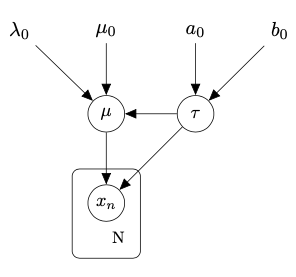

### ***Question 1.2.7:***

Implement a function that generates data points for the given model.

In [ ]:
import numpy as np
from scipy import stats
from scipy.special import digamma, gammaln
import matplotlib.pyplot as plt

In [106]:
def generate_data(mu, tau, N):
  np.random.seed(0)
  D = np.random.normal(mu, 1/np.sqrt(tau), N)
  return D


Set μ = 1, τ = 0.5 and generate datasets with size N=10,100,1000. Plot the histogram for each of 3
datasets you generated.



In [107]:
mu = 1
tau = 0.5

dataset_1 = generate_data(mu, tau, 10)
dataset_2 = generate_data(mu, tau, 100)
dataset_3 = generate_data(mu, tau, 1000)

# Visulaize the datasets via histograms
# Insert your code here

plt.hist(dataset_1, bins=30, alpha=0.5, label='N=10')
plt.savefig('Report/figures/1.2/dataset_1.png')
plt.clf()
plt.hist(dataset_2, bins=30, alpha=0.5, label='N=100')
plt.savefig('Report/figures/1.2/dataset_2.png')
plt.clf()
plt.hist(dataset_3, bins=30, alpha=0.5, label='N=1000')
plt.savefig('Report/figures/1.2/dataset_3.png')
plt.clf()


<Figure size 640x480 with 0 Axes>

### ***Question 1.2.8:***

Find ML estimates of the variables μ and τ

In [108]:
def ML_est(data):
  return np.mean(data), 1/np.var(data)

In [109]:
print(ML_est(dataset_1))
print(ML_est(dataset_2))
print(ML_est(dataset_3))


(2.043722377390312, 0.5346208711845316)
(1.0845813067074894, 0.49220998007161765)
(0.9359973504790137, 0.513223482048345)


### ***Question 1.2.9:***

What is the exact posterior? First derive it in closed form, and then implement a function that computes it for the given parameters:


def compute_exact_posterior(D, a_0, b_0, mu_0, lambda_0):
  # your implementation

  return exact_post_dist_parameters

In [ ]:
def compute_exact_posterior(D, a_0, b_0, mu_0, lambda_0):

    N = len(D)
    x_bar = np.mean(D)
    sum_squared_diffs = np.sum((D - x_bar) ** 2)

    lambda_N = lambda_0 + N
    mu_N = (lambda_0 * mu_0 + N * x_bar) / lambda_N
    a_N = a_0 + N / 2
    b_N = b_0 + 0.5 * sum_squared_diffs + (lambda_0 * N * (x_bar - mu_0) ** 2) / (2 * lambda_N)

    return a_N, b_N, mu_N, lambda_N


### ***Question 1.2.10:***
You will implement the VI algorithm for the variational distribution in Equation (10.24) in Bishop. Start with introducing the prior parameters:

In [111]:
# prior parameters
mu_0 = 0
lambda_0 = 0.1
a_0 = 0.1
b_0 = 0.1

Continue with a helper function that computes ELBO:


In [ ]:

def compute_elbo(D, a_0, b_0, mu_0, lambda_0, a_N, b_N, mu_N, lambda_N):
    
    N = len(D)
    x_bar = np.mean(D)
    sum_squared_diffs = np.sum((D - x_bar) ** 2)

    E_tau = a_N / b_N
    E_log_tau = digamma(a_N) - np.log(b_N)

    term1 = 0.5 * N * (E_log_tau - np.log(2 * np.pi)) - 0.5 * E_tau * (
        sum_squared_diffs + N * (x_bar - mu_N) ** 2 + (1 / lambda_N)
    )

    term2 = 0.5 * (E_log_tau - np.log(2 * np.pi / lambda_0)) - 0.5 * E_tau * (
        lambda_0 * (mu_N - mu_0) ** 2 + (1 / lambda_N)
    )

    term3 = a_0 * np.log(b_0) - gammaln(a_0) + (a_0 - 1) * E_log_tau - b_0 * E_tau

    entropy_q_mu = 0.5 * np.log(2 * np.pi * np.e / (lambda_N * E_tau))

    entropy_q_tau = a_N - np.log(b_N) + gammaln(a_N) + (1 - a_N) * digamma(a_N)

    elbo = term1 + term2 + term3 + entropy_q_mu + entropy_q_tau

    return elbo



Now, implement the CAVI algorithm:

In [ ]:
def CAVI(D, a_0, b_0, mu_0, lambda_0, max_iter=100, tol=1e-6):
    N = len(D)
    x_bar = np.mean(D)
    sum_squared_diffs = np.sum((D - x_bar) ** 2)

    E_tau = a_0 / b_0

    mu_N = mu_0
    lambda_N = lambda_0
    a_N = a_0
    b_N = b_0

    elbos = []
    prev_elbo = -np.inf

    for iteration in range(max_iter):
        lambda_N = lambda_0 + N * E_tau
        mu_N = (lambda_0 * mu_0 + N * E_tau * x_bar) / lambda_N

        a_N = a_0 + (N + 1) / 2
        b_N = b_0 + 0.5 * (
            sum_squared_diffs + N * (x_bar - mu_N) ** 2 + (1 / lambda_N) + lambda_0 * (mu_N - mu_0) ** 2
        )

        E_tau = a_N / b_N
        E_log_tau = digamma(a_N) - np.log(b_N)

        elbo = compute_elbo(D, a_0, b_0, mu_0, lambda_0, a_N, b_N, mu_N, lambda_N)
        elbos.append(elbo)

        if np.abs(elbo - prev_elbo) < tol:
            print(f"Converged at iteration {iteration + 1}")
            break
        prev_elbo = elbo

    return a_N, b_N, mu_N, lambda_N, elbos


Run the VI algorithm on the datasets. Compare the inferred variational
distribution with the exact posterior and the ML estimate. Visualize the results and discuss your
findings.


Converged at iteration 5
5


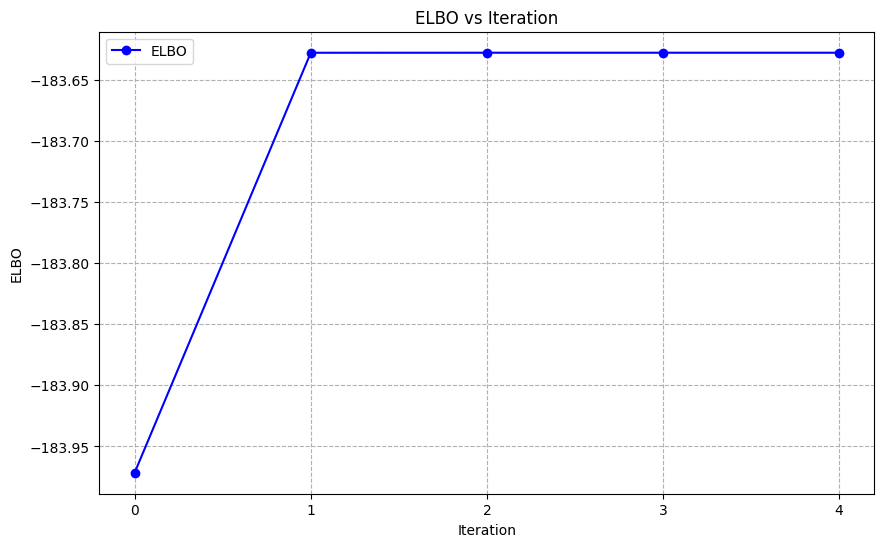

(50.1, 101.7414189949626, 1.083497808898591, 100.1)
50.6 101.75151311843236 1.0824046996719534 49.828990212759585


<Figure size 640x480 with 0 Axes>

In [ ]:
mu_ml, tau_ml = ML_est(dataset_3)
a_N, b_N, mu_N, lambda_N, elbos = CAVI(dataset_2, a_0, b_0, mu_0, lambda_0, max_iter=1000, tol=1e-10)

print(len(elbos))
plt.figure(figsize=(10, 6))
plt.plot(range(0,len(elbos)), elbos, label='ELBO', color='blue', marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.xticks(np.arange(min(range(0,len(elbos))), max(range(0,len(elbos)))+1, 1))  # Set x-axis to display only integer values
plt.ylabel('ELBO')
plt.title('ELBO vs Iteration')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()
plt.savefig('Report/figures/1.2/elbos.png')
plt.clf()

exact_post_dist_param = compute_exact_posterior(dataset_2, a_0, b_0, mu_0, lambda_0)
print(exact_post_dist_param)
print(a_N, b_N, mu_N, lambda_N)





In [115]:
def plot_contour(dataset):
    x = np.linspace(0,3,500)
    y = np.linspace(0,1.5,500)
    X, Y = np.meshgrid(x, y)
    a_ex, b_ex, mu_ex, lambda_ex = compute_exact_posterior(dataset, a_0, b_0, mu_0, lambda_0)
    Z_ex = stats.norm.pdf(X, mu_ex, scale= 1/np.sqrt(lambda_ex)) * stats.gamma.pdf(Y, a_ex, scale=1/b_ex)

    a_CAVI, b_CAVI, mu_CAVI, lambda_CAVI, _ = CAVI(dataset, a_0, b_0, mu_0, lambda_0)
    Z_CAVI = stats.norm.pdf(X, mu_CAVI, scale = 1/np.sqrt(lambda_CAVI)) * stats.gamma.pdf(Y, a_CAVI, scale=1/b_CAVI)

    mu_ml, tau_ml = ML_est(dataset)


    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z_ex, colors='red', label='Exact Posterior')
    plt.contour(X, Y, Z_CAVI, colors='blue', label='CAVI Posterior')
    plt.plot([], [], color='red', label='Exact Posterior')
    plt.plot([], [], color='blue', label='CAVI Posterior')
    plt.scatter(mu_ml, tau_ml, color='green', label='ML estimate')
    plt.xlabel('mu')
    plt.ylabel('tau')
    plt.title('Posterior Distribution')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.savefig('Report/figures/1.2/posterior_dataset_.png')
    plt.clf()

In [118]:
plot_contour(dataset_1)
plot_contour(dataset_2)
plot_contour(dataset_3)

Converged at iteration 5


C:\Users\leolu\AppData\Local\Temp\ipykernel_13956\405870615.py:15: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z_ex, colors='red', label='Exact Posterior')
C:\Users\leolu\AppData\Local\Temp\ipykernel_13956\405870615.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z_CAVI, colors='blue', label='CAVI Posterior')


Converged at iteration 4
Converged at iteration 3


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>